In [2]:
#importing
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter


In [3]:
#import the dataset provided german.data into the workspace and apply relevent headers for easier understanding
data = pd.read_csv('german.data', header =None, sep=' ', names=["Status", "Duration_month", "Credit_History", "Purpose", "Credit_Amount", "Savings_accountBonds", "Present_employment_since", "Installment_rate_per_dis_income", "Personal_status_sex", "other_debtors_guarantors", "Present_residence_since", "Property", "Age_years", "other_installment_plans", "housing", "number_existing_credits_atbank", "Job", "no_of_people_being_liable_to_provide_maintenance_for", "telephone", "foreign_worker", "Prediction"])
print(data)
y = data.Prediction #define the target variable as y


    Status  Duration_month Credit_History Purpose  Credit_Amount  \
0      A11               6            A34     A43           1169   
1      A12              48            A32     A43           5951   
2      A14              12            A34     A46           2096   
3      A11              42            A32     A42           7882   
4      A11              24            A33     A40           4870   
5      A14              36            A32     A46           9055   
6      A14              24            A32     A42           2835   
7      A12              36            A32     A41           6948   
8      A14              12            A32     A43           3059   
9      A12              30            A34     A40           5234   
10     A12              12            A32     A40           1295   
11     A11              48            A32     A49           4308   
12     A12              12            A32     A43           1567   
13     A11              24            A34     A4

In [48]:
#quick check of first 5 records to confirm correct entry
data.head()

,Status,Duration_month,Credit_History,Purpose,Credit_Amount,Savings_account/Bonds,Present_employment_since,Installment_rate_%_dis_income,Personal_status_sex,other_debtors_guarantors,...,Property,Age_years,other_installment_plans,housing,number_existing_credits_atbank,Job,no_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,Prediction
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [19]:
data["Prediction"].value_counts()
#Classification Variable used in training and prediction

1    700
2    300
Name: Prediction, dtype: int64

In [20]:
data.isnull().any()
#checks the dataframe for null values or empty values and returns a boolean value of true 
#if they exist or false if there are no nulls in the attribute

Status                                                  False
Duration_month                                          False
Credit_History                                          False
Purpose                                                 False
Credit_Amount                                           False
Savings_accountBonds                                    False
Present_employment_since                                False
Installment_rate_per_dis_income                         False
Personal_status_sex                                     False
other_debtors_guarantors                                False
Present_residence_since                                 False
Property                                                False
Age_years                                               False
other_installment_plans                                 False
housing                                                 False
number_existing_credits_atbank                          False
Job     

In [18]:
data.isnull().sum()
#checks the dataframe for null values or empty values and if there are any then counts how many per attribute/feature

Status                                                  0
Duration_month                                          0
Credit_History                                          0
Purpose                                                 0
Credit_Amount                                           0
Savings_account/Bonds                                   0
Present_employment_since                                0
Installment_rate_%_dis_income                           0
Personal_status_sex                                     0
other_debtors_guarantors                                0
Present_residence_since                                 0
Property                                                0
Age_years                                               0
other_installment_plans                                 0
housing                                                 0
number_existing_credits_atbank                          0
Job                                                     0
no_of_people_b

In [20]:
#It appears there are no missing values in the dataset as in null values, 
#a secondary check will be conducted using a count on each feature to check for 1000 entires
data.count()

Status                                                  1000
Duration_month                                          1000
Credit_History                                          1000
Purpose                                                 1000
Credit_Amount                                           1000
Savings_account/Bonds                                   1000
Present_employment_since                                1000
Installment_rate_%_dis_income                           1000
Personal_status_sex                                     1000
other_debtors_guarantors                                1000
Present_residence_since                                 1000
Property                                                1000
Age_years                                               1000
other_installment_plans                                 1000
housing                                                 1000
number_existing_credits_atbank                          1000
Job                     

In [25]:
#Check for incorrect categorical variables that are outside scope of data dictionary
#As we were asked to find missing values and it appears that their are none, another thing to check is that all the features
#have no anomalys or incorrect data entries.

#WIP

In [22]:
#WIP Investigate tomorrow
print(data.corr())

                                                    Duration_month  \
Duration_month                                            1.000000   
Credit_Amount                                             0.624984   
Installment_rate_%_dis_income                             0.074749   
Present_residence_since                                   0.034067   
Age_years                                                -0.036136   
number_existing_credits_atbank                           -0.011284   
no_of_people_being_liable_to_provide_maintenanc...       -0.023834   
Prediction                                                0.214927   

                                                    Credit_Amount  \
Duration_month                                           0.624984   
Credit_Amount                                            1.000000   
Installment_rate_%_dis_income                           -0.271316   
Present_residence_since                                  0.028926   
Age_years               

In [19]:
#WIP 
print(data.cov())

                                                    Duration_month  \
Duration_month                                          145.415006   
Credit_Amount                                         21273.749776   
Installment_rate_%_dis_income                             1.008389   
Present_residence_since                                   0.453418   
Age_years                                                -4.956995   
number_existing_credits_atbank                           -0.078600   
no_of_people_being_liable_to_provide_maintenanc...       -0.104069   
Prediction                                                1.188288   

                                                    Credit_Amount  \
Duration_month                                       2.127375e+04   
Credit_Amount                                        7.967843e+06   
Installment_rate_%_dis_income                       -8.567708e+02   
Present_residence_since                              9.012011e+01   
Age_years               

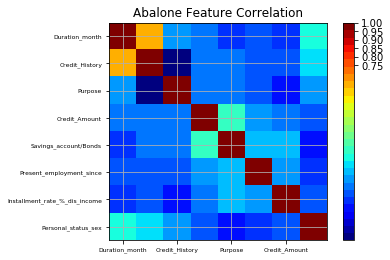

In [24]:
#WIP Investigate tomorrow
def correlation_matrix(data):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(data.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=["Status", "Duration_month", "Credit_History", "Purpose", "Credit_Amount", "Savings_account/Bonds", "Present_employment_since", "Installment_rate_%_dis_income", "Personal_status_sex", "other_debtors_guarantors", "Present_residence_since", "Property", "Age_years", "other_installment_plans", "housing", "number_existing_credits_atbank", "Job", "no_of_people_being_liable_to_provide_maintenance_for", "telephone", "foreign_worker", "Prediction"]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(data)

In [4]:
#As above the dataset is imbalanced in a ratio of 70-30 positive to negative to correct this imbalance oversampling will be done
#Before oversampling can occur the data set will be split into the Training-Test-Validation set
#This is to avoid bleeding information from the validation set into the training of the model and potentially overfitting the model



In [ ]:
#Next steps
#Evaulate the data and determine which features to try in first iteration of model.

In [4]:
#Create a data subset that has only the features determined to be of use
#first iteration for testing purposes data analysis still needs to be done
model_variables = ["Status", "Duration_month", "Credit_History", "Purpose", "Credit_Amount", "Savings_accountBonds", "Present_employment_since", "Installment_rate_per_dis_income", "Personal_status_sex", "other_debtors_guarantors", "Present_residence_since", "Property", "Age_years", "other_installment_plans", "housing", "number_existing_credits_atbank", "Job", "no_of_people_being_liable_to_provide_maintenance_for", "telephone", "foreign_worker", "Prediction"]

data_relevent = data[model_variables]

In [5]:
#encode categorical features as binary
data_encoded = pd.get_dummies(data_relevent)
data_encoded.head()

,Duration_month,Credit_Amount,Installment_rate_per_dis_income,Present_residence_since,Age_years,number_existing_credits_atbank,no_of_people_being_liable_to_provide_maintenance_for,Prediction,Status_A11,Status_A12,...,housing_A152,housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,6,1169,4,4,67,2,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,2,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,2,1,0,...,0,1,0,0,1,0,1,0,1,0


In [6]:
# create training and testing vars
training_features, test_features, \
training_target, test_target, = train_test_split(data_encoded.drop(['Prediction'], axis=1),
                                               data_encoded['Prediction'],
                                               test_size = .2,
                                               random_state=12)

In [7]:
#Oversampling only the training data
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target, test_size=0.2, random_state=12)


In [24]:
x_val["Prediction"].value_counts()

1    130
2     70
Name: Prediction, dtype: int64

In [8]:
#More reading to be done on smote as i managed to get it to work to rebalance the data but their are some problems. 
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train_res)))


Resampled dataset shape Counter({1: 456, 2: 456})


In [9]:
#attempting to get the syntax correct for a doing a random forest, not actually working with correct logic yet
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [10]:
#Rough test using all variables potentially have a few variables around the wrong way need to look into. 
#Basically now i have learnt as iv never used python before i plan to dive more into the actually data and see how i
#improve my model.
print ('Validation Results')
print (clf_rf.score(x_val, y_val))
print (recall_score(y_val, clf_rf.predict(x_val)))
print ('\nTest Results')
print (clf_rf.score(test_features, test_target))
print (recall_score(test_target, clf_rf.predict(test_features)))

Validation Results
0.725
0.850877192982

Test Results
0.725
0.884615384615


In [11]:
#attempting to make a confusion matrix
# TP FP
# FN TN
from sklearn.metrics import confusion_matrix
y_true = y_val
y_pred = clf_rf.predict(x_val)
confusion_matrix(y_true, y_pred)

array([[97, 17],
       [27, 19]], dtype=int64)